In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv('hazardous_work.csv', encoding='windows-1251', sep=';')

In [44]:
print(df.columns)
df['hazardous_work_share'] = df['hazardous_work_share'].str.replace(',', '.', regex=False).str.strip()
df['hazardous_work_share'] = pd.to_numeric(df['hazardous_work_share'], errors='coerce')


Index(['region', 'hazardous_work_share'], dtype='object')


In [45]:
mean_value = df['hazardous_work_share'].mean()
median_value = df['hazardous_work_share'].median()
min_value = df['hazardous_work_share'].min()
max_value = df['hazardous_work_share'].max()
mode_value = df['hazardous_work_share'].mode()[0]  # берём первую моду
range_value = max_value - min_value

In [46]:
shift = 0.15 * range_value
shifted_median = median_value + shift

# Вывод основных статистик
print(f"Среднее значение удельного веса: {mean_value:.2f}%")
print(f"Медиана удельного веса: {median_value:.2f}%")
print(f"Смещённая медиана удельного веса: {shifted_median:.2f}%")
print(f"Размах удельного веса: {range_value:.2f}%")
print(f"Мода: {mode_value:.2f}%")


Среднее значение удельного веса: 37.41%
Медиана удельного веса: 37.10%
Смещённая медиана удельного веса: 45.19%
Размах удельного веса: 53.90%
Мода: 37.50%


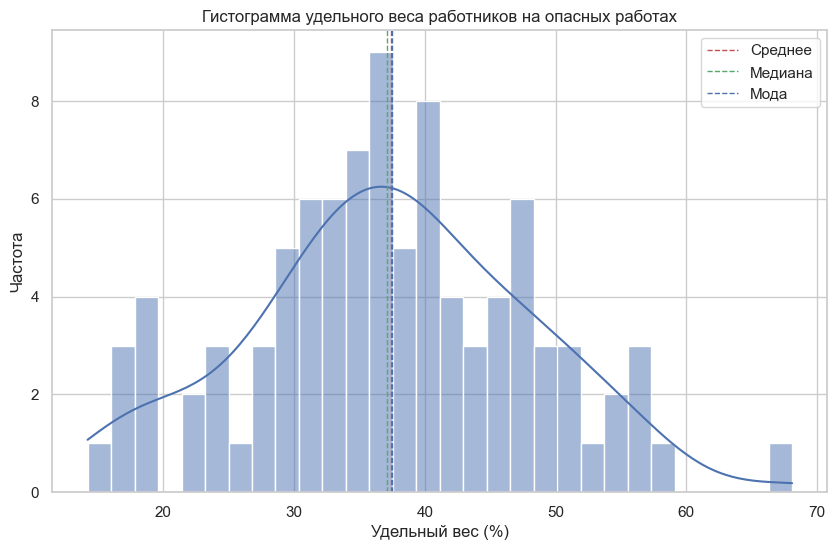

In [47]:
sns.set(style="whitegrid")

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df['hazardous_work_share'], bins=30, kde=True)
plt.title('Гистограмма удельного веса работников на опасных работах')
plt.xlabel('Удельный вес (%)')
plt.ylabel('Частота')
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=1, label='Медиана')
plt.axvline(mode_value, color='b', linestyle='dashed', linewidth=1, label='Мода')
plt.legend()
plt.show()

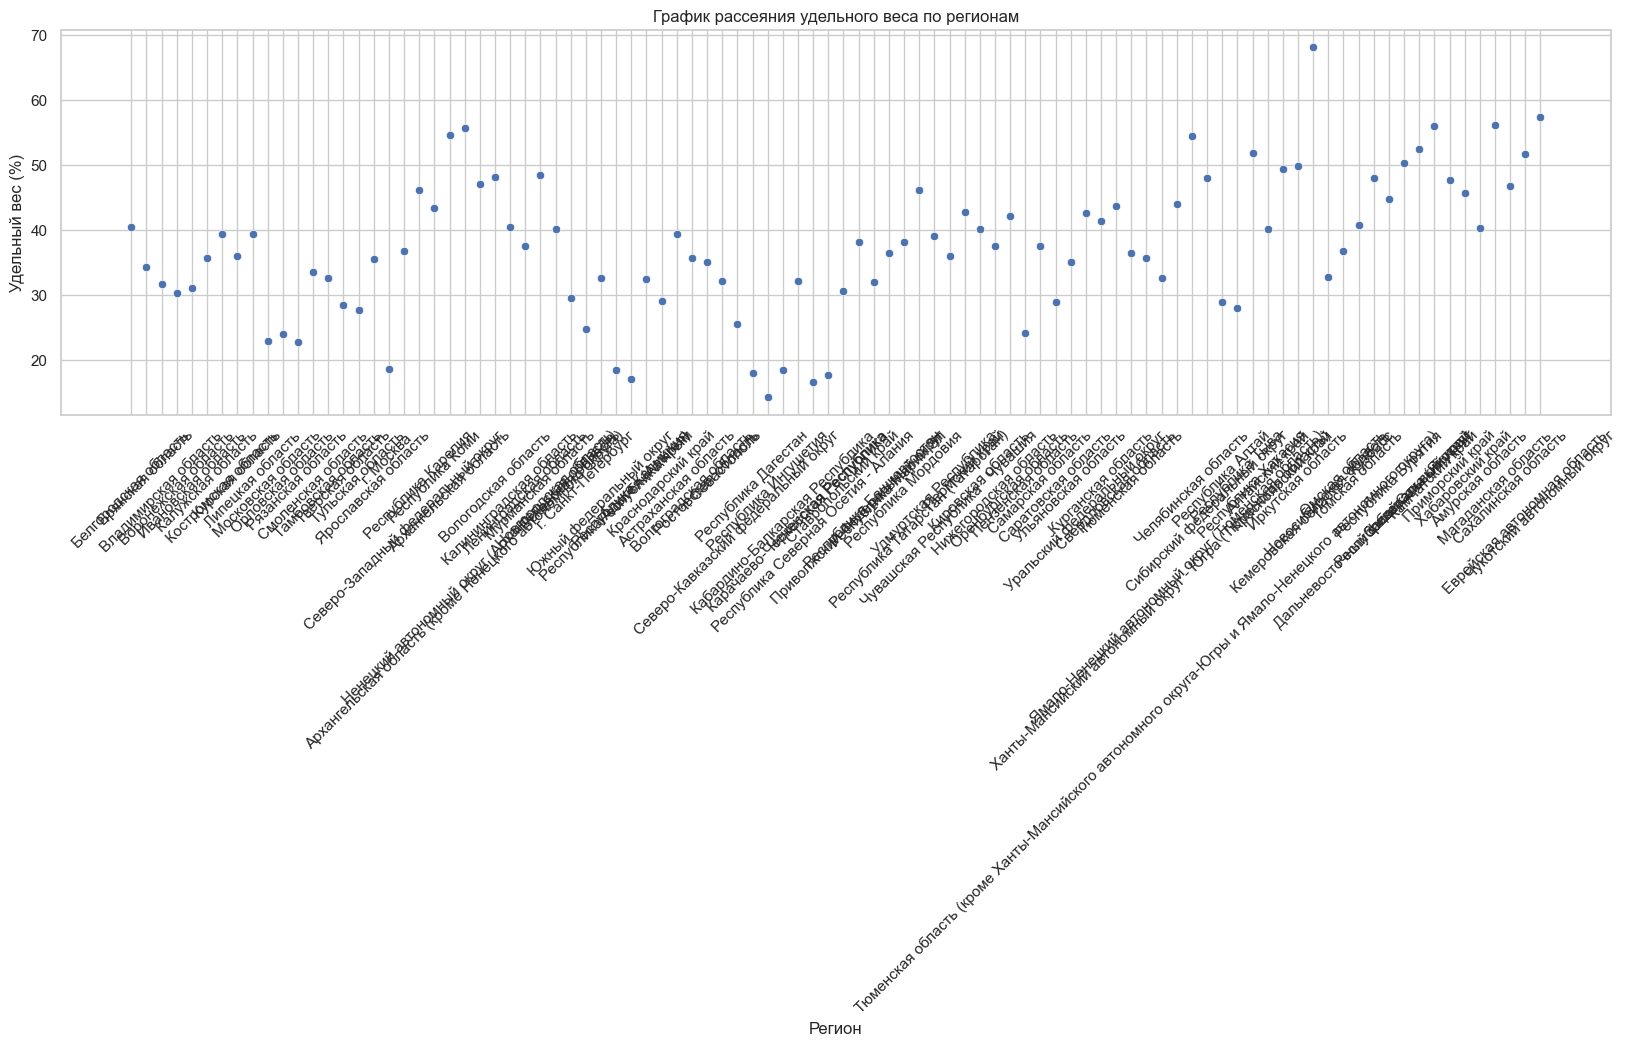

In [48]:
# Визуализация графика рассеяния
plt.figure(figsize=(20, 5))
sns.scatterplot(x='region', y='hazardous_work_share', data=df)
plt.title('График рассеяния удельного веса по регионам')
plt.xlabel('Регион')
plt.ylabel('Удельный вес (%)')
plt.xticks(rotation=45)
plt.show()

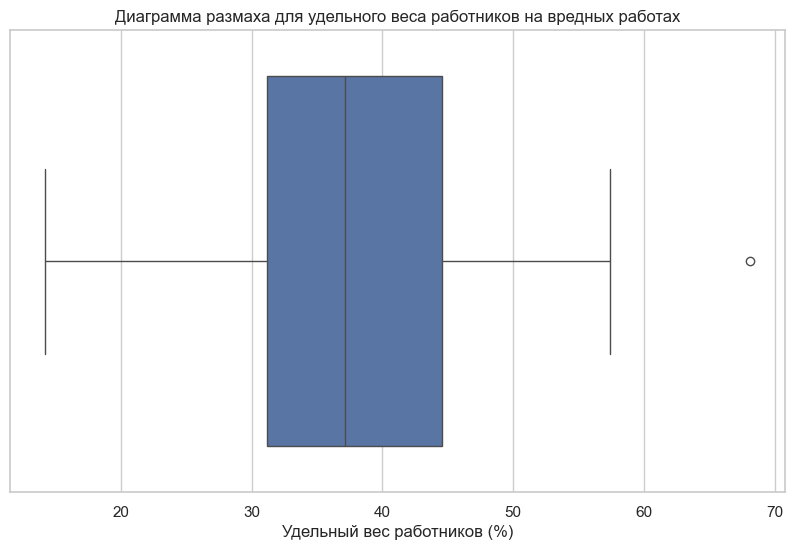

Аномальные значения (выбросы):
                           region  hazardous_work_share
78  Кемеровская область - Кузбасс                  68.1


In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hazardous_work_share'])
plt.title('Диаграмма размаха для удельного веса работников на вредных работах')
plt.xlabel('Удельный вес работников (%)')
plt.show()

Q1 = df['hazardous_work_share'].quantile(0.25)
Q3 = df['hazardous_work_share'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Найдем выбросы
outliers = df[(df['hazardous_work_share'] < lower_bound) | (df['hazardous_work_share'] > upper_bound)]
print("Аномальные значения (выбросы):")
print(outliers)


Аномальные значения в распределении удельного веса работников на вредных и опасных работах могут быть объяснены следующими факторами:\
Индустриализация региона — регионы с развитой добывающей и тяжелой промышленностью (например, Кемеровская, Челябинская области) имеют высокие значения из-за вредных условий труда на производстве.\
Климатические условия — суровые климатические регионы (Якутия, Чукотка) могут увеличивать долю опасных работ из-за влияния климата на условия труда.\
Удаленность и инфраструктурные ограничения — труднодоступные регионы (Магадан, Забайкалье) могут испытывать проблемы с безопасностью из-за устаревшего оборудования и логистических сложностей.\
Сельскохозяйственная специфика — регионы с низкой индустриализацией и преобладанием сельского хозяйства (Ингушетия, Чечня) имеют меньшую долю вредных рабочих мест.\
Исторически сложившиеся промышленные центры — старые индустриальные регионы (Свердловская, Архангельская области) сохраняют высокую долю опасных рабочих мест, связанных с тяжелой промышленностью.